  Q1)
  

Enter numbers of random data you want to gerenate: 1000000
Enter the number of bins you want:51


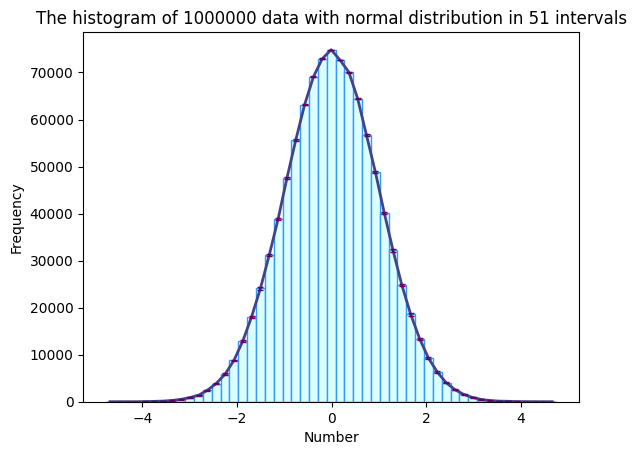

In [10]:
# Import needed libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate n random numbers with normal distribution(for normal distribution run this block.)
n = int(input('Enter numbers of random data you want to gerenate: '))
random_number = np.random.normal(0, 1, 1000000)
data = np.random.choice(random_number, n , replace = False)
# number of bins we want
bins = int(input('Enter the number of bins you want:'))

# Calculate the bin centers and the histogram values and the bin wodth
hist_values, bin_edges = np.histogram(data, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate the error for each interval
def Error_for_each_interval(data, bins, bin_edges):
  errors = []
  for i in range(bins):
    numinbins = []
    for j in data:
      if(j >= bin_edges[i]  and j <= bin_edges[i+1]):
        numinbins.append(j)
        binmid = (bin_edges[i] + bin_edges[i+1]) /2
    if len(numinbins) != 0:
      mu = binmid * len(numinbins) / (n)
      sigma2 = ((binmid**2)*len(numinbins))- (n * (mu**2)) / (n-1)
      vari = (sigma2)**(1/2)
      filter_arr = []
      for element in data:
        if element >=bin_edges[i]  and element <= bin_edges[i+1]:
          filter_arr.append(element)
      # Remove Probability < 0
      if (len(filter_arr) - vari) <= 0:
          vari = len(filter_arr)
      errors.append(vari)
    if len(numinbins) == 0:
      errors.append(0.0)
  errors = np.array(errors)
  return errors

# Create the histogram
def plot(x,bins,bin_centers, hist_values,yerrors):

  plt.hist(x, bins=bins , color='#DCFFFF' , edgecolor='#3399FF')

  # Plot the distribution function
  plt.plot(bin_centers, hist_values, '#43438A', linewidth=2)

  # Plot the error bars
  plt.errorbar(bin_centers, hist_values, yerr=yerrors, fmt='none', color='#660066', capsize=2)

  # Set the labels and title
  plt.xlabel('Number')
  plt.ylabel('Frequency')
  plt.title(f'The histogram of {n} data with normal distribution in {bins} intervals')

  # Display the plot
  plt.show()

plot(data, bins,bin_centers,hist_values , Error_for_each_interval(data, bins, bin_edges))

In [11]:
data = np.sort(data)

xpxlist = []
nxlist = []
dataorder = []
binmid = []
for i in range(bins):
  binmidbin = (bin_edges[i] + bin_edges[i+1]) /2
  binmid.append(binmidbin)
  numinbins = []
  for j in data:
    if(j >= bin_edges[i]  and j < bin_edges[i+1]):
      numinbins.append(j)
      dataorder.append(j)
  nx = len(numinbins)
  nxlist.append(nx)

pxlist = []
kol = sum(nxlist)
for element in nxlist:
  px = element / kol
  pxlist.append(px)

totalaverage = np.average(data)
errorsbins = Error_for_each_interval(data, bins, bin_edges)
sigmakol = (sum((errorsbins)**2)**(1/2))

Enter numbers of moments you want to gerenate: 7


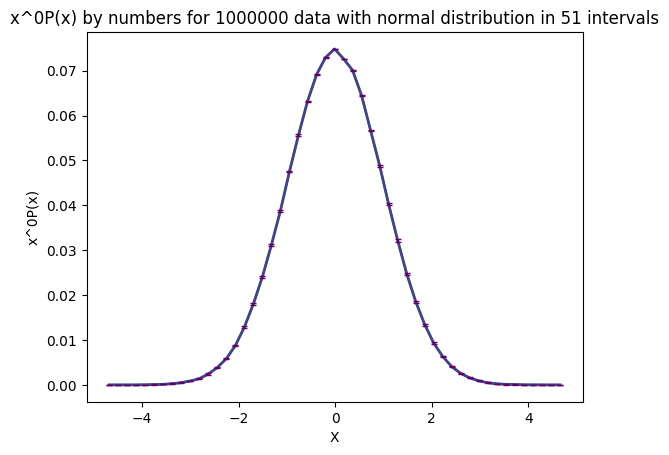

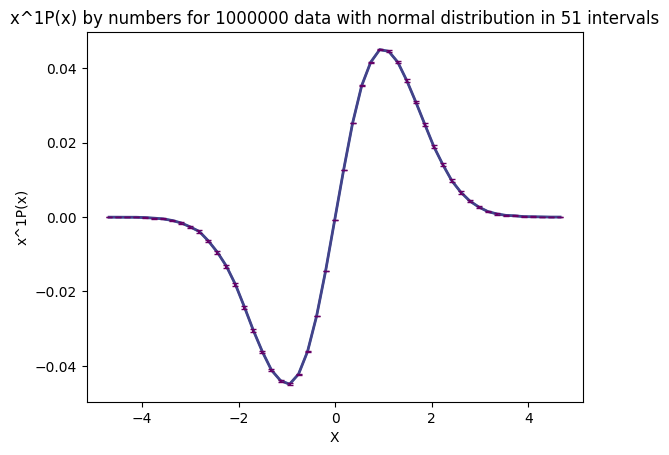

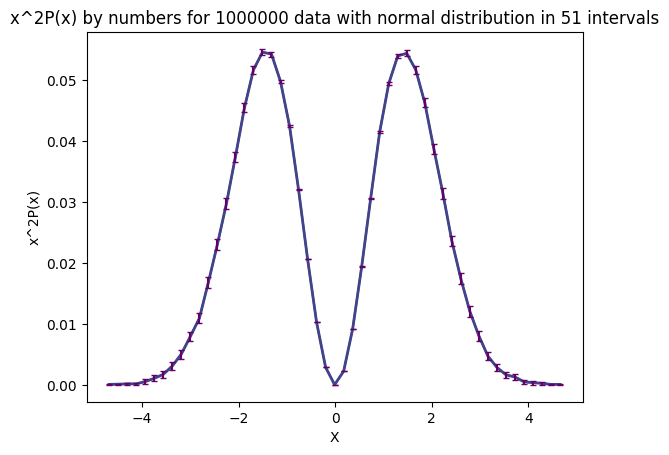

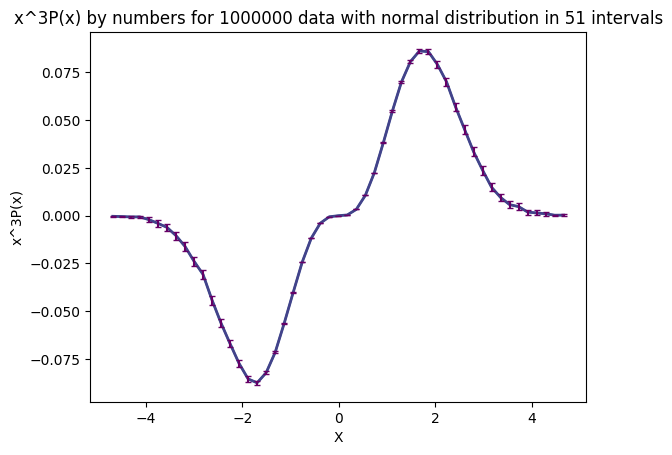

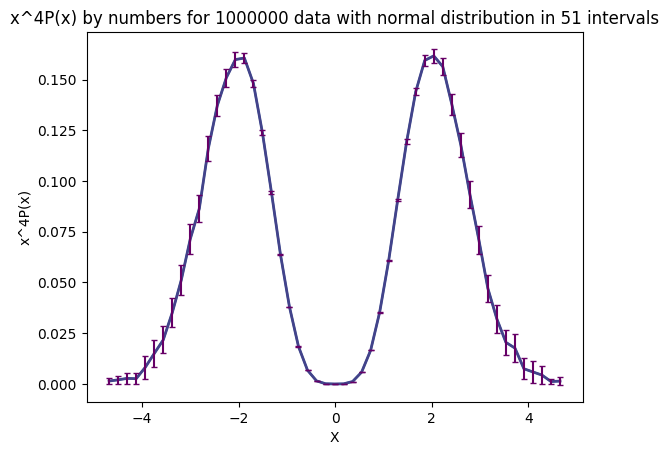

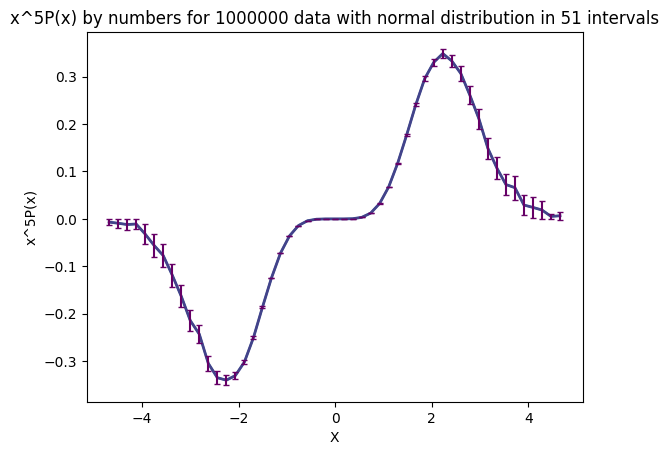

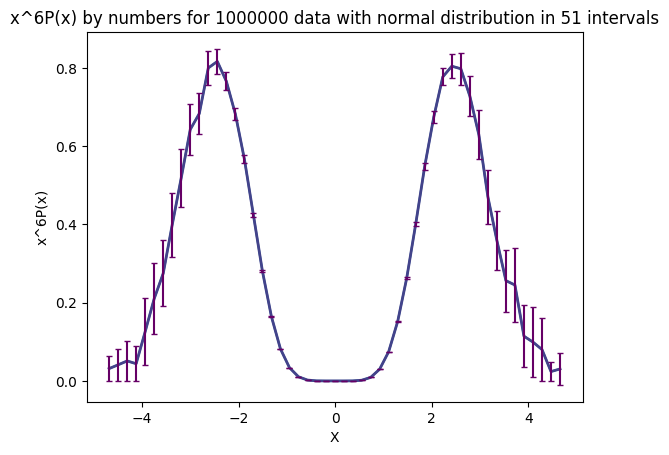

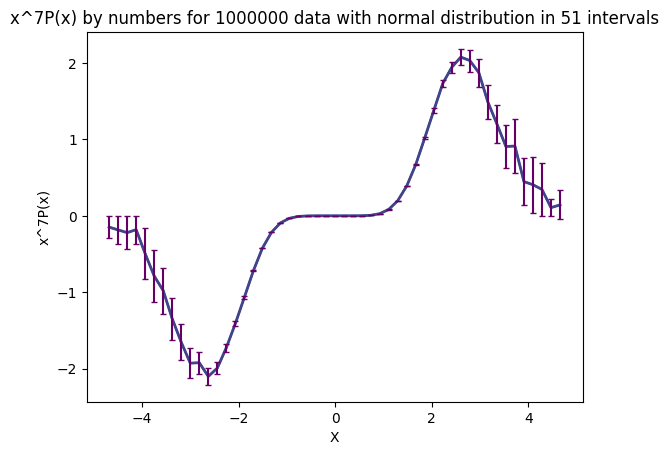

In [12]:
yerrors = []
for i in range(len(binmid)):
  newerr = ((((binmid[i])**2)*((sigmakol/((kol)**2)))**2)+((errorsbins[i]/kol)**2))**(1/2)
  yerrors.append(newerr)

mnmnt = int(input('Enter numbers of moments you want to gerenate: '))
for x in range(0 ,mnmnt+1):
  xpxlist =[]
  yerrors1=[]
  for i in range(len(binmid)):
    xpx = (binmid[i]**x) * pxlist[i]
    yerrorstemp = abs((binmid[i]**x))*yerrors[i]
    xpxlist.append(xpx)
    yerrors1.append(yerrorstemp)
  binmid = np.sort(binmid)
  plt.plot(binmid , xpxlist)
  plt.plot(binmid, xpxlist, '#43438A', linewidth=2)
  plt.errorbar(binmid, xpxlist, yerr=yerrors1, fmt='none', color='#660066', capsize=2)
  plt.xlabel('X')
  plt.ylabel(f'x^{x}P(x)')
  plt.title(f'x^{x}P(x) by numbers for {n} data with normal distribution in {bins} intervals')
  plt.show()

Q2)


Enter numbers of moments you want to gerenate: 20


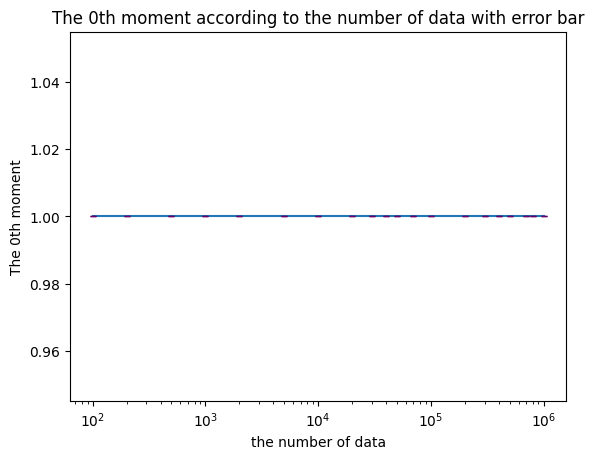

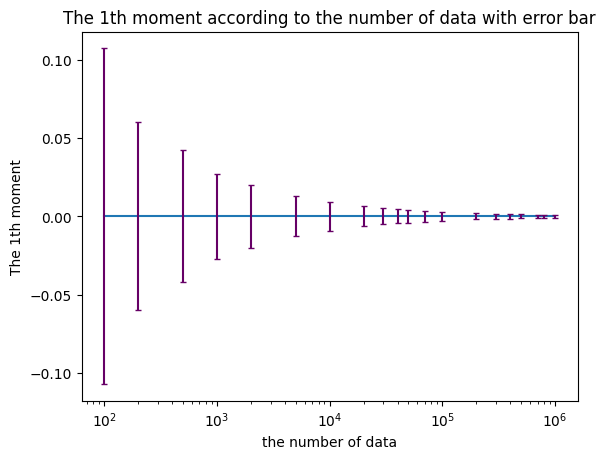

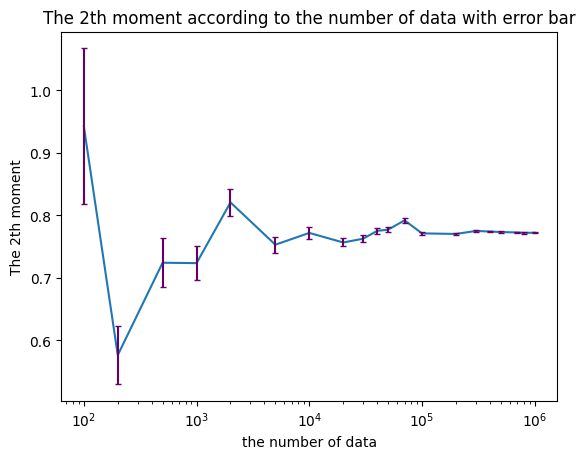

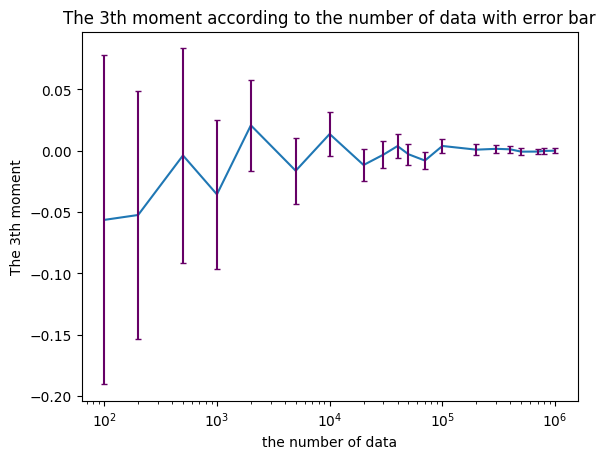

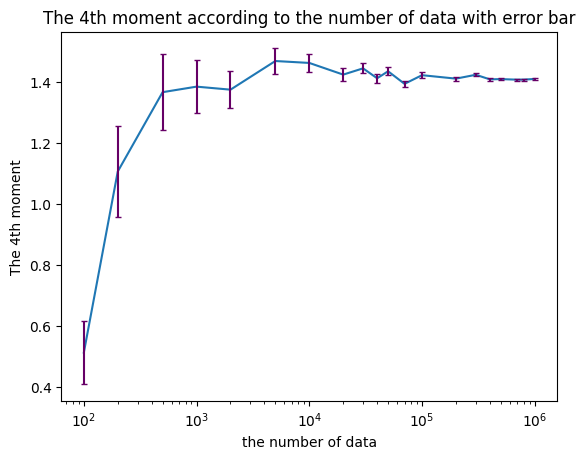

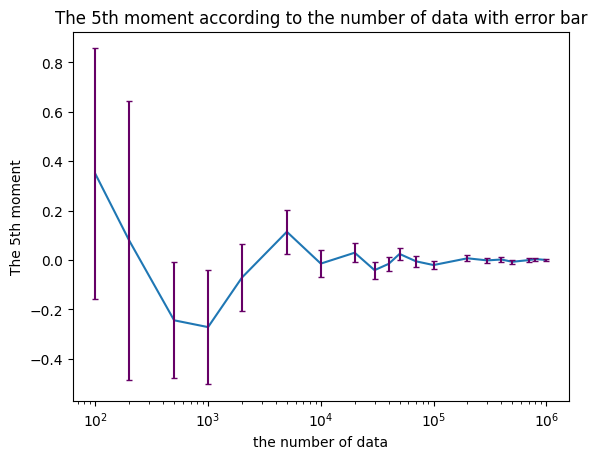

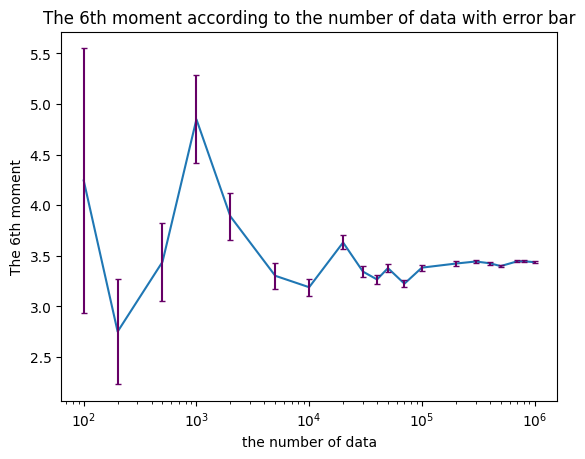

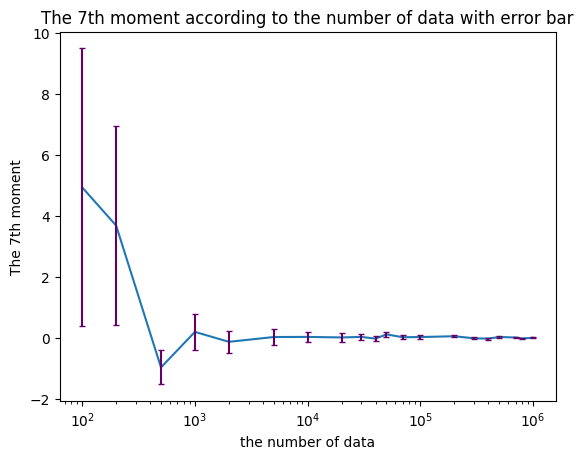

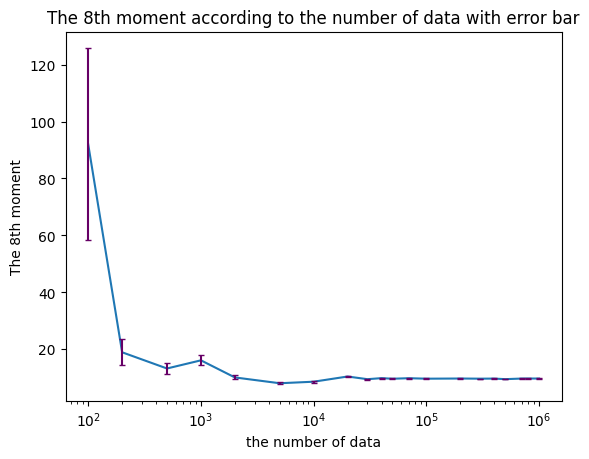

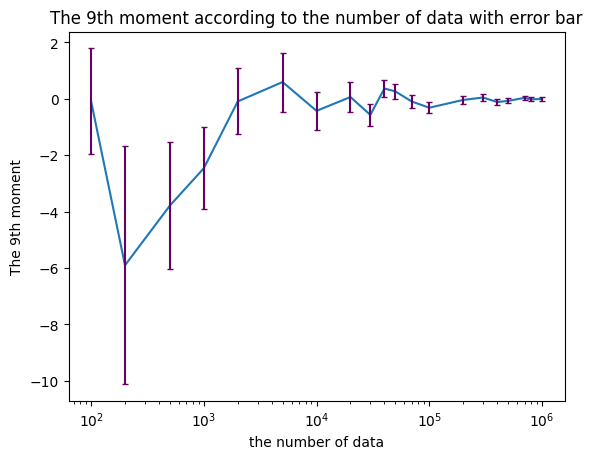

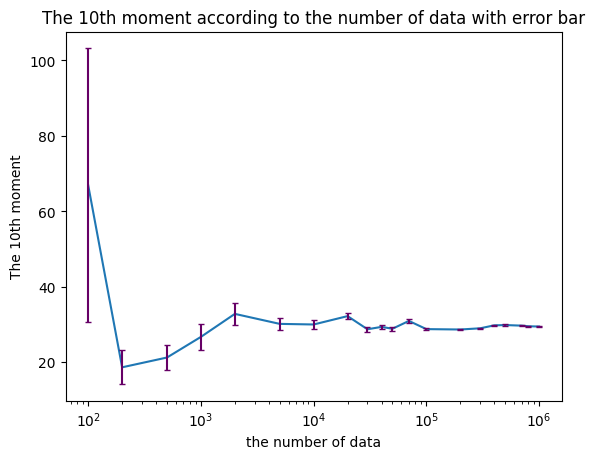

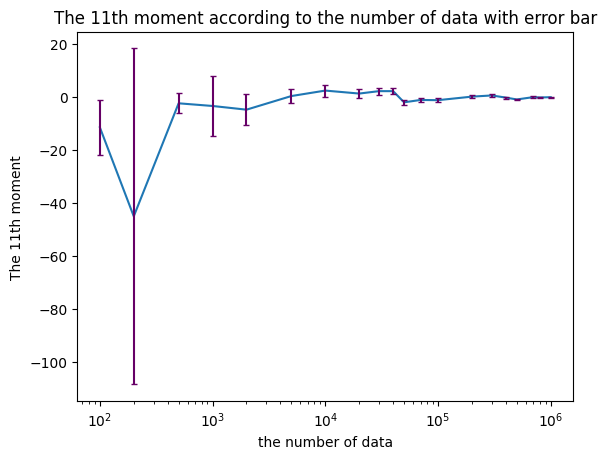

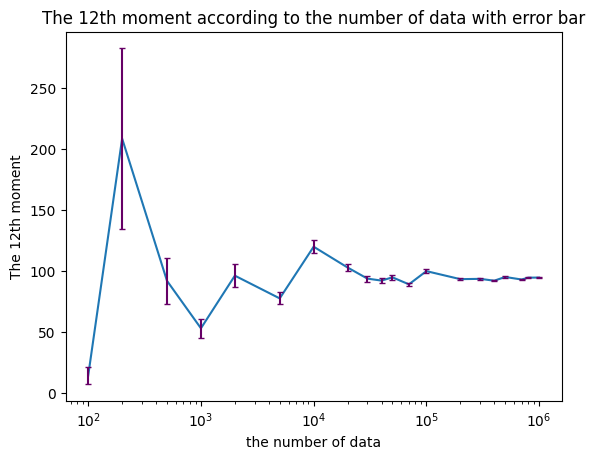

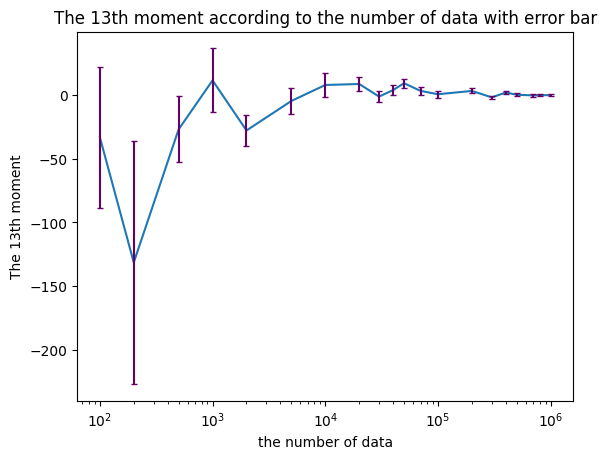

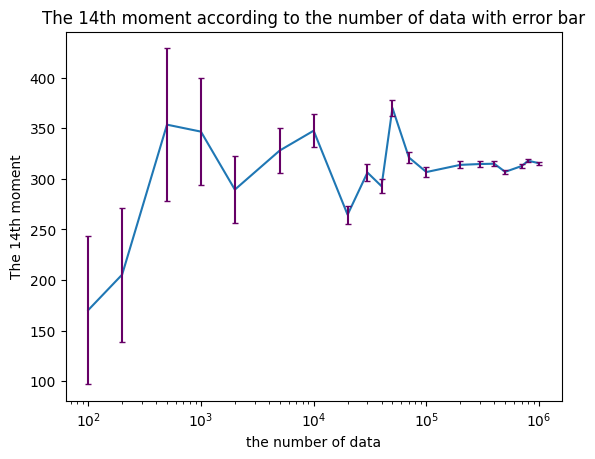

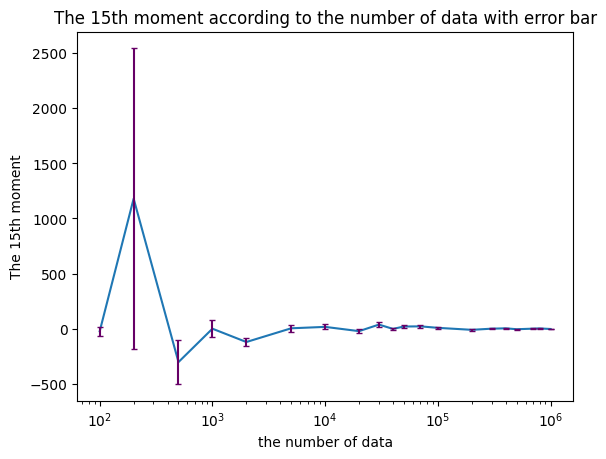

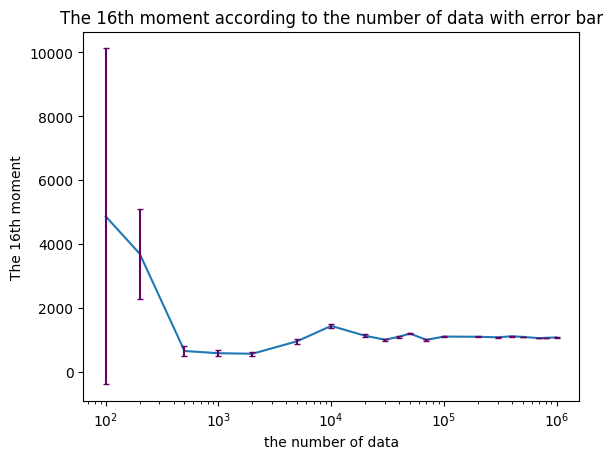

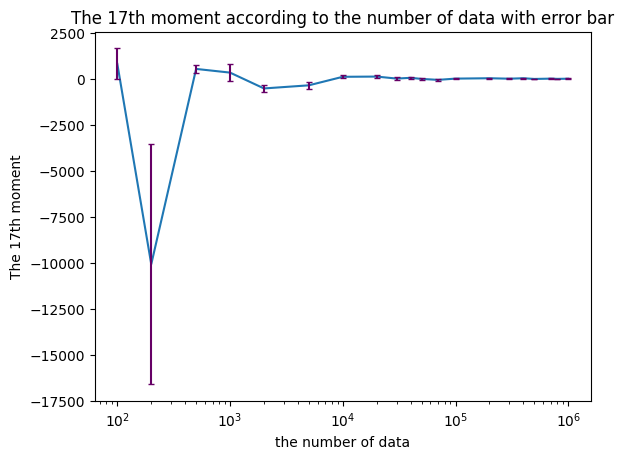

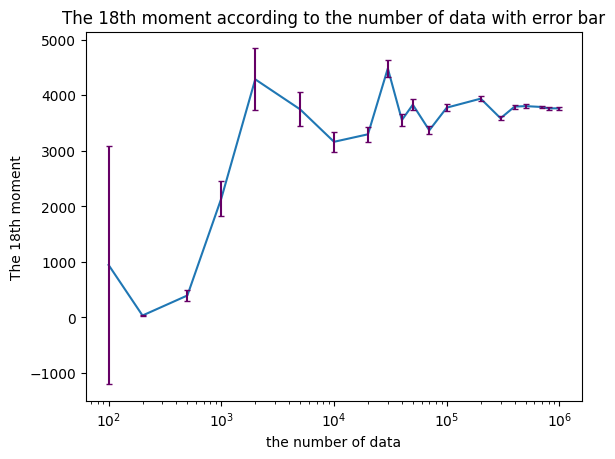

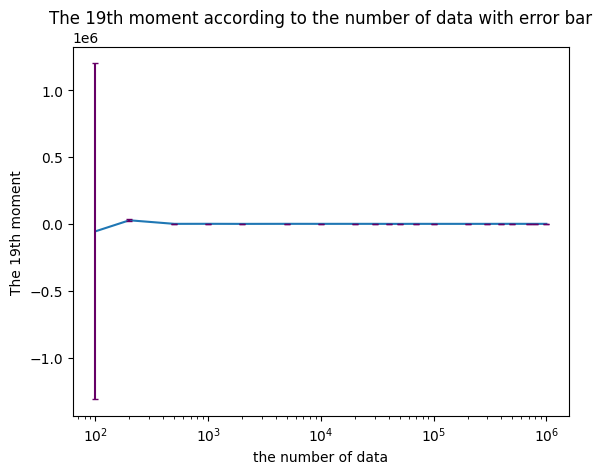

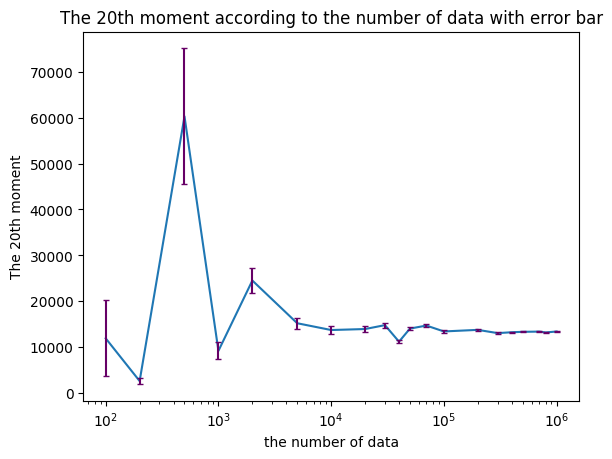

In [ ]:
# Import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

n_list = [100,200,500,1000,2000,5000,10000,20000,30000,40000,50000,70000,100000,200000,300000,400000,500000,700000,800000,1000000]
random_number = np.random.normal(0, 1, 1000000)
random_number = np.sort(random_number)
moment_n = int(input('Enter numbers of moments you want to gerenate: '))
for n_m in range(moment_n+1):
  y_axis = []
  errors = []
  for n in n_list:
    data = np.random.choice(random_number, n , replace = False)
    vari = np.var(data)
    clean_data =[]
    for element in data:
      if element < 2 * vari and element > -2 * vari:
        clean_data.append(element)
    clean_data = np.sort(clean_data)
    y = stats.moment(clean_data, moment = n_m)
    y_axis.append(y)
    error = np.sqrt((np.sum(((clean_data**(n_m)) - y)**2)) / (len(clean_data)*(len(clean_data)-1)))
    errors.append(error)
  plt.plot(n_list,y_axis)
  plt.errorbar(n_list,y_axis,yerr=errors, fmt='none', color='#660066', capsize=2)
  plt.xscale("log")
  # Set the labels and title
  plt.xlabel('the number of data')
  plt.ylabel(f'The {n_m}th moment')
  plt.title(f'The {n_m}th moment according to the number of data with error bar')
  plt.show()